In [34]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.manifold import TSNE
import seaborn as sns

## Step 1: Retrieving Dataset

In [25]:
url_red = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
url_white = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv"


red_wine = pd.read_csv(url_red, sep=';')
white_wine = pd.read_csv(url_white, sep=';')

In [26]:
# Combining both datasets
wine_data = pd.concat([red_wine, white_wine], axis=0)

In [27]:
print(wine_data.info()) 
print(wine_data.describe()) 

<class 'pandas.core.frame.DataFrame'>
Index: 6497 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 659.9 KB
None
       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    6497.000000       6497.000000  6497.000000    

## Step 2: Normalizing Dataset

In [29]:

scaler = StandardScaler()
features = wine_data.drop('quality', axis=1)  # Assuming 'quality' is the target variable
normalized_features = scaler.fit_transform(features)

# Creating a DataFrame with normalized features
normalized_wine = pd.DataFrame(normalized_features, columns=features.columns)

## Step 3: Applying PCA and Visualization

In [77]:
pca = PCA(n_components=2)  
pca_result = pca.fit_transform(normalized_features)

In [78]:
explained_variance = pca.explained_variance_ratio_
print("Explained Variance:", explained_variance)


Explained Variance: [0.2754426  0.22671146]


Q.) Identify the variance explained by each principal component and discuss the
trade-off between dimensionality reduction and information loss.


## Variance Contribution of Principal Components
The explained variance represents the proportion of the dataset's total variance accounted for by each principal component.

# Trade-off Between Dimensionality Reduction and Information Loss

## Retaining Fewer Components (Dimensionality Reduction)

1. Reduces dataset complexity.
2. Improves computational efficiency.
3. Useful for visualization (e.g., reducing to 2D or 3D).
4. Some variance (information) is lost, impacting accuracy.

## Keeping More Components (Minimizing Information Loss)

1. Preserves more variance, leading to higher accuracy in machine learning models.
2. Increased computational cost and model complexity.
3. Harder to visualize and interpret.

## Finding the Optimal Balance

1. Typically, 95% variance retention is a good compromise.
2. If fewer components retain most of the variance, reducing dimensions is beneficial.
3. If variance drops sharply after the first few components, higher dimensions are necessary.

In [84]:
pca_wine_data = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2'])
pca_wine_data['quality'] = wine_data['quality'].values 

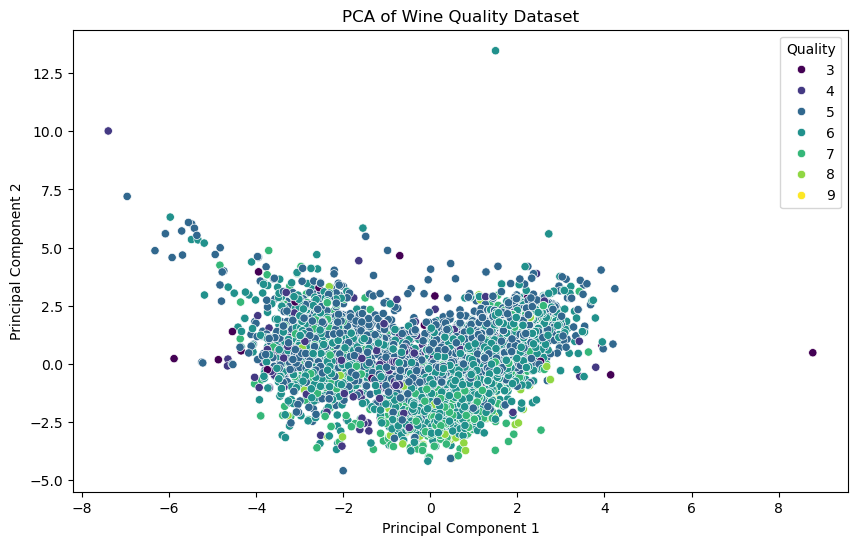

In [85]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC1', y='PC2', hue='quality', data=pca_wine_data, palette='viridis')
plt.title('PCA of Wine Quality Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Quality')
plt.show()


## Analysis of Principal Components
The first principal component (PC1) captures 27.54% of the total dataset variance.
The second principal component (PC2) accounts for 22.67% of the variance.
Together, these two components preserve approximately 50.21% of the dataset's total variance.

## Balancing Dimensionality Reduction and Information Retention
Reducing high-dimensional data to 2D using PCA leads to some loss of variance (information).
Including additional principal components would increase variance retention but at the expense of higher dimensionality.
The objective is to find an optimal balance, ensuring the transformed data remains informative while reducing complexity.


## Scree Plot for Component Selection
A scree plot (which visualizes the variance explained by each principal component) can help determine the ideal number of components to retain, ensuring that essential patterns in the data are preserved.









## Step 3: Comparison with t-SNE

In [81]:
tsne = TSNE(n_components=2, random_state=42)
tsne_result = tsne.fit_transform(normalized_features)

In [82]:
tsne_wine_data = pd.DataFrame(data=tsne_result, columns=['TSNE1', 'TSNE2'])
tsne_wine_data['quality'] = wine_data['quality'] 

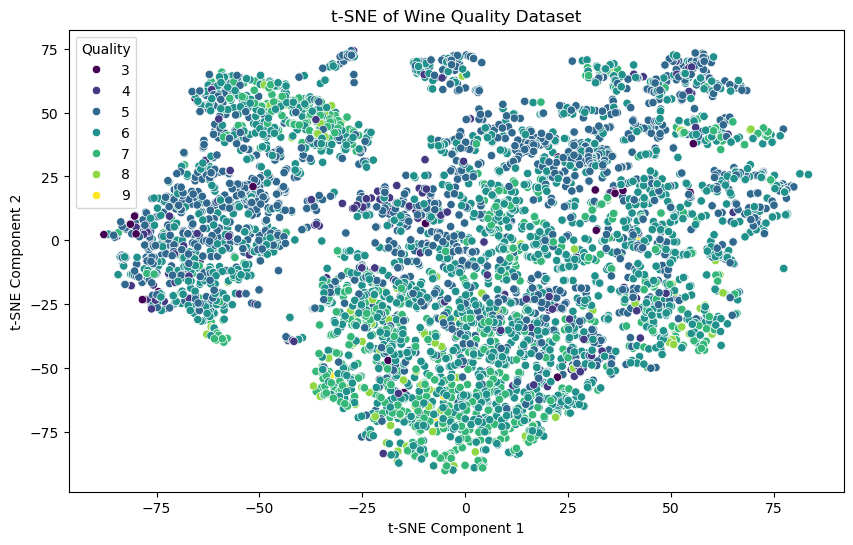

In [83]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='TSNE1', y='TSNE2', hue='quality', data=tsne_wine_data, palette='viridis')
plt.title('t-SNE of Wine Quality Dataset')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.legend(title='Quality')
plt.show()

# Discuss how PCA and t-SNE handle high-dimensional data differently

## Comparison of PCA and t-SNE Visualizations
This section analyzes the outcomes of applying PCA and t-SNE to the Wine Quality dataset.

## Insights from PCA
PCA reduces high-dimensional data by projecting it onto the first two principal components, capturing 27.5% and 22.7% of the variance.
Data points are densely clustered near the center with moderate dispersion along the principal components.
There is significant overlap between different wine quality levels, with no distinct separation.
The data structure remains linear, as PCA is a linear transformation technique.

## Insights from t-SNE
t-SNE generates a nonlinear representation, producing well-defined clusters within the dataset.
It effectively preserves local relationships, revealing finer-grained structures in the data.
Wine quality levels are better separated, making classification and pattern recognition easier.
The distribution of data points is highly nonlinear, capturing complex relationships that PCA may miss.
## Comparison and Trade-offs
| **Method** |	**Pros** |	**Cons** |
|------------|-----------|-----------|
|**PCA**|	Retains **global structure**, efficient, interpretable through variance analysis	| Assumes **linear relationships**, may fail to uncover hidden patterns |
|**t-SNE**|	Preserves **local structures**, enhances clustering, captures complex relationships |	Computationally intensive, lacks interpretability, results vary with hyperparameters |

### **Key Takeaways**
1. **PCA is ideal for dimensionality reduction**, maintaining interpretability and summarizing variance effectively.
2. **t-SNE excels at visualization and clustering**, uncovering **nonlinear patterns** and **separating data points clearly**.
3. For **classification or clustering analysis**, **t-SNE** is the preferred choice.
4. For reducing **dimensions before modeling**, **PCA** is more practical and computationally efficient.








## Compare the results with PCA in terms of interpretability and clustering.

| Aspect                     | PCA                                      | t-SNE                                   |
|-----------------------------|------------------------------------------|-----------------------------------------|
| **Approach**             | Linear technique for reducing dimensions        | Non-linear technique for dimensionality reduction     |
| **Interpretability**        | Highly interpretable; principal components are linear combinations of original features |	Less interpretable; axes do not directly correspond to original features|
| **Computational Efficiency**| Fast and scalable for large datasets |	Computationally expensive; slower with large datasets |
| **Cluster Representation**    | Maintains global structure but may cause cluster overlap |	Effectively highlights clusters by preserving local structure |
| **Parameter Dependence**   | Minimal parameter tuning required |	Sensitive to hyperparameters like perplexity |

# Report

## The trade-offs between PCA and t-SNE.


### 1. Purpose & Approach

i)  PCA: Linear technique that maximizes variance and finds principal components.

ii)  t-SNE: Non-linear technique that preserves local structure and relationships between data points.

### 2. Computational Complexity & Speed

i)  PCA: Fast, scalable for large datasets, time complexity O(n³).

ii)  t-SNE: Slow for large datasets, time complexity O(n²) or worse.


### 3. Information Retention & Data Representation
i)  PCA: Preserves global structure but may not highlight local clusters.

ii)  t-SNE: Preserves local structure but loses global variance information.

iii)  PCA: Retains feature interpretability (principal components can be analyzed).

iv)  t-SNE: No direct feature interpretation, used mainly for visualization.

### 4. Visualization & Clustering

i)  PCA: Good for 2D/3D visualization, but clusters may overlap.

ii)  t-SNE: Better at revealing hidden clusters, making it useful for exploratory data analysis.

iii)  PCA: Deterministic (same result every time).

iv)  t-SNE: Non-deterministic (slightly different results in each run).

### 5. Use Cases & Best Practices

Use PCA when:

i)  You need feature selection for machine learning.
ii)  You are working with large datasets.
iii)  You need an interpretable transformation.
iv)  You want to reduce dimensionality while retaining most variance.

Use t-SNE when:

i)  You need to visualize high-dimensional data.
ii)  You are looking for natural clusters in the data.
iii)  You have a small dataset (<10,000 samples).
iv)  You care more about local relationships than global structure.

## Key observations from the visualizations.

### PCA Visualization:

1. Global Structure: PCA retains the overall variance in the dataset but does not reveal distinct clusters.
2. Linear Separation: The data points are spread along the first two principal components, but no clear separation of wine quality classes is visible.
3. Compact Representation: Most data points are concentrated in the middle, suggesting that high-dimensional variance is not completely captured in just two principal components.
4. Interpretability: PCA components can be analyzed to understand which features contribute most to the variance.

### t-SNE Visualization:

1. Better Cluster Separation: Unlike PCA, t-SNE reveals distinct clusters, indicating that some wine qualities may share unique patterns.
2. Local Structure Preservation: Similar wine qualities appear closer to each other, demonstrating t-SNE's ability to group related data points.
3. Non-Linear Relationships: Unlike PCA, t-SNE captures complex relationships in the data, making it useful for clustering.
4. Scaling Sensitivity: t-SNE has larger value ranges on both axes, making direct interpretation of distances challenging.

### Comparison & Insights:

1. PCA is useful for reducing dimensionality while keeping variance, making it ideal for feature selection and machine learning models.
2. t-SNE is superior for visualization and clustering, highlighting natural groupings in the dataset but not useful for predictive modeling due to its non-deterministic nature.
3. Using PCA before t-SNE (e.g., reducing to 50 components before applying t-SNE) can improve performance on large datasets.